In [209]:
import pandas as pd
import numpy as np
df1=pd.read_csv('data/TechCosts.csv')
df2=pd.read_csv('data/gen_new_build_costs_v2-Draft.tab',sep='\t')

In [210]:
df1=df1.rename(columns = {df1.columns.tolist()[0]:'gen_tech'})
df1=df1.sort_values('gen_tech',axis=0)
df1=df1.reset_index(drop=True)
df1=df1.fillna(0)
df2=df2[df2['investment_period']==2020]
df2=df2.replace('wind','eolic')
df2=df2.replace('thermosolar ','termosolar')
df2=df2.sort_values('generation_technology',axis=0)
df2=df2.reset_index(drop=True)
df2=df2.fillna(0)


In [211]:
df3=pd.DataFrame()
for i in list(set(df1['gen_tech'].tolist())):
    a= df1[df1['gen_tech']==i].mean()
    a['gen_tech']=i
    df3=df3.append(a,ignore_index=True)
b=df3.columns.tolist()
b=[b[2]]+[x for x in b if x not in ["gen_tech"]]
df3=df3[b]
df3=df3.sort_values('gen_tech')
df3=df3.reset_index(drop=True)
df4=pd.concat([df2,df3],axis=1)
df4[df4.columns.tolist()[2:4]]=df4[df4.columns.tolist()[2:4]]/1000

,generation_technology,investment_period,g_overnight_cost,g_fixed_o_m,source,gen_tech,capacity_mw,fixed_o_m,overnight_cost,variable_o_m
0,bio_diesel,2020,2341.5000,44.30000,piirce_piirce,bioenergy_diesel,20.000000,60.000000,1980.000000,15.000000
1,bio_fuel_oil,2020,2341.5000,44.25400,pirceAssumed_piirce,bioenergy_fuel_oil,20.000000,60.000000,1980.000000,15.000000
2,bio_natural_gas,2020,2359.2230,35.55870,piirce_piirce,bioenergy_natural_gas,20.000000,60.000000,1980.000000,15.000000
3,carboelectric,2020,1899.3390,36.46360,copar_copar,carboelectric_coal,525.000000,33.373000,1408.500000,2.420000
4,cogen_diesel,2020,1656.8870,25.93810,piirce_piirce,cogen_diesel,613.480000,60.219400,2632.600000,7.090000
5,cogen_fuel_oil,2020,2341.5000,44.30000,piirce_piirce,cogen_fuel_oil,613.480000,60.219400,2632.600000,7.090000
6,cogen_natural_gas,2020,1009.7285,17.42740,piirce_piirce,cogen_natural_gas,613.480000,60.219400,2632.600000,7.090000
7,combined_cycle,2020,910.2800,16.02480,copar_copar,combined_cycle_natural_gas,985.780000,16.793200,848.000000,2.966000
8,eolic,2020,2016.0000,24.96300,copar_copar,eolic,2.000000,24.963000,1836.000000,0.000000
9,fluidized_bed,2020,1899.3390,36.46360,copar_copar_carboelectric,fluidized_bed_coal,350.000000,35.219000,1757.000000,2.530000


In [187]:
import matplotlib.pyplot as plt

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


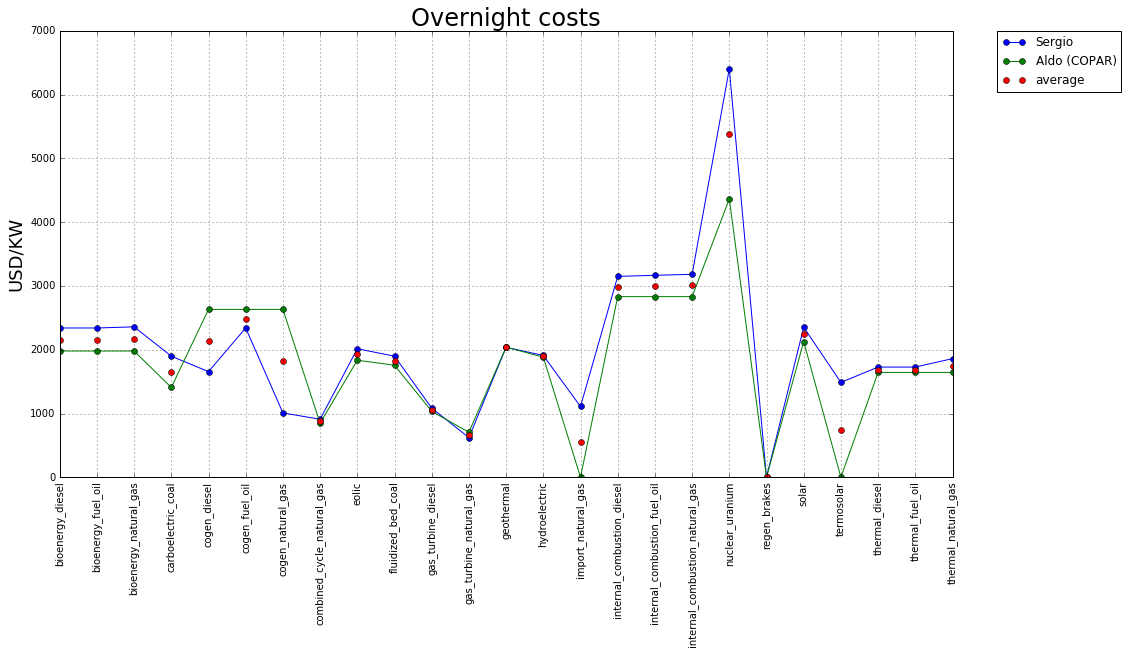

In [212]:
df5=df4[['gen_tech','g_overnight_cost','overnight_cost']]
df5['average']=(df5.iloc[:,1]+df5.iloc[:,2])/2
df5['difference']=abs(df5.iloc[:,1]-df5.iloc[:,2])
plt.figure(1,figsize=[16,8],dpi=200)
plt.plot(df5.iloc[:,1],marker='o',label='Sergio')
plt.plot(df5.iloc[:,2],marker='o',label='Aldo (COPAR)')
plt.grid()
plt.title('Overnight costs',fontsize=24)
plt.ylabel('USD/KW', fontsize=18)
plt.xticks(df5.index.tolist(),df5['gen_tech'].tolist(),rotation='vertical')
plt.errorbar(range(len(df5.index.tolist())),df5['average'],label='average',fmt='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Aldo\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


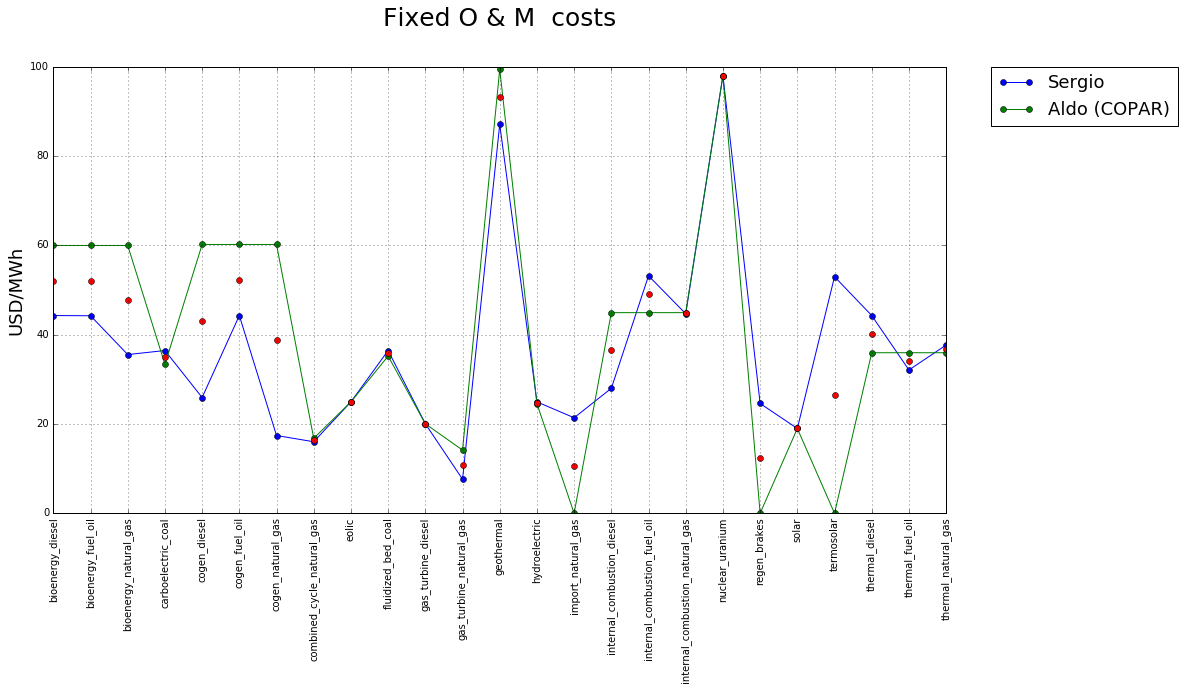

In [213]:
df6=df4[['gen_tech','g_fixed_o_m','fixed_o_m']]
df6['average']=(df6.iloc[:,1]+df6.iloc[:,2])/2
df6['difference']=abs(df6.iloc[:,1]-df6.iloc[:,2])
plt.figure(2,figsize=[16,8],dpi=200)
plt.plot(df6.iloc[:,1],marker='o',label='Sergio')
plt.plot(df6.iloc[:,2],marker='o',label='Aldo (COPAR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=18)
plt.grid()
plt.title('Fixed O & M  costs',fontsize=25,y=1.08)
plt.ylabel('USD/MWh',fontsize=18)
plt.xticks(df5.index.tolist(),df5['gen_tech'].tolist(),rotation='vertical')
plt.errorbar(range(len(df6.index.tolist())),df6['average'],label='average',fmt='o')
plt.show()